# Bernstein-Vazirani Algorithm

In [ ]:
from openql import openql as ql
import hisplot as hp
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
rootDir = os.path.dirname(os.path.realpath("bv.ipynb"))
curdir = os.path.dirname("bv.ipynb")
output_dir = os.path.join(curdir, 'bv_output')
num_qubits = 4

In [ ]:
ql.set_option('output_dir', output_dir)

platform = ql.Platform('platform', 'none')
kernel = ql.Kernel('bv_kernel', platform, num_qubits)

program = ql.Program('bv', platform, num_qubits)


Initializing

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)
kernel.hadamard(2)
kernel.hadamard(3)

kernel.z(3)

Oracle

In [ ]:
kernel.cnot(1, 3)
kernel.cnot(2, 3)

Diffuser

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)
kernel.hadamard(2)

Measurements

In [ ]:
kernel.measure(0)
kernel.measure(1)
kernel.measure(2)

In [ ]:
program.add_kernel(kernel)
program.compile()

In [ ]:
import qxelarator
from functools import reduce

qx = qxelarator.QX()
qx.set('bv_output/bv.qasm')

ntests = 1000
results = []

nmeasure = 3

for i in range(ntests):
    qx.execute()
    # print(qx.get_measurement_outcome(0))
    res = [int(qx.get_measurement_outcome(q)) for q in range(nmeasure)]
    result = reduce(lambda x, y: x + str(y), res, "|") + "⟩"
    results.append(result)

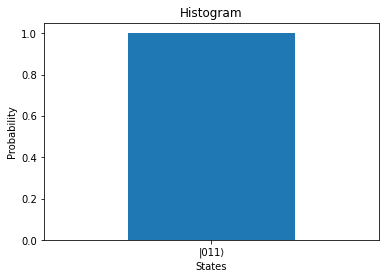

In [ ]:
hp.plot_histogram(results)

Wniosek

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ee9a0e1-5142-4a5e-b221-8d22021093a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>